## 선형 회귀와 자동 미분(Linear Regression and Autograd)

### 1) 훈련 데이터셋과 테스트 데이터셋

어떤 학생이 1시간 공부를 했더니 2점, 다른 학생이 2시간 공부를 했더니 4점, 또 다른 학생이 3시간을 공부했더니 6점을 맞았습니다. 

그렇다면, 내가 4시간을 공부한다면 몇 점을 맞을 수 있을까요?

### 2) 훈련 데이터셋의 구성

x_train은 공부한 시간, y_train은 그에 맵핑되는 점수를 의미

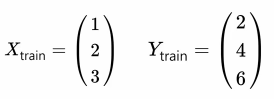

In [2]:
import torch

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

### 3) 가설(Hypothesis) 수립

선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일입니다. 

이때 선형 회귀의 가설(직선의 방정식)은 아래와 같은 형식을 가집니다.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>=</mo>
  <mi>W</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
</math>

가설의 H를 따서 y대신 다음과 같이 식을 표현하기도 합니다.

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>W</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
</math>

이때 x와 곱해지는 W를 가중치(Weight)라고 하며, b를 편향(bias)이라고 합니다.

### 4) 비용 함수(Cost function)

**비용 함수(cost function) = 손실 함수(loss function) = 오차 함수(error function) = 목적 함수(objective function)**

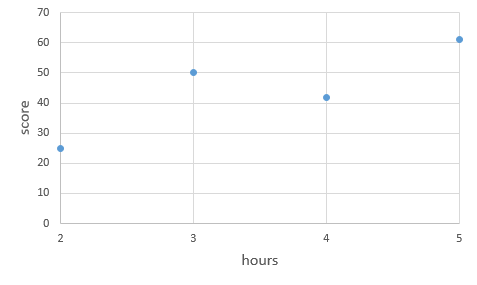

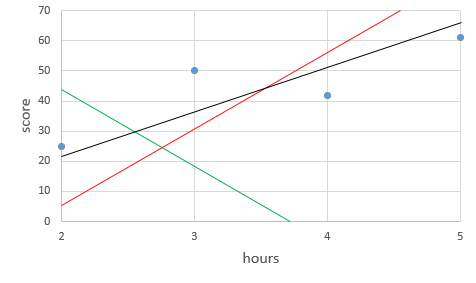

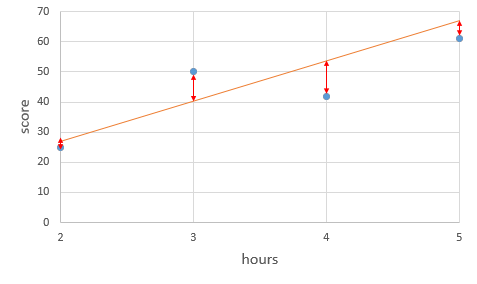

위 주황색 직선의 식은 y = 13x + 1이며, 각 오차는 다음과 같습니다.

|hours(x)|	2|	3|	4|	5|
|--|--|--|--|--|
|실제값|	25|	50|	42|	61|
|예측값|	27|	40|	53|	66|
|오차|	-2|	10|	-9|	-5|

평균 제곱 오차를 W와, b에 의한 비용 함수(Cost function)로 재정의하면,

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>c</mi>
  <mi>o</mi>
  <mi>s</mi>
  <mi>t</mi>
  <mo stretchy="false">(</mo>
  <mi>W</mi>
  <mo>,</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mi>n</mi>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">[</mo>
      <msup>
        <mi>y</mi>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">(</mo>
          <mi>i</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
      <mo>&#x2212;</mo>
      <mi>H</mi>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">(</mo>
          <mi>i</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
      <mo stretchy="false">)</mo>
      <mo data-mjx-texclass="CLOSE">]</mo>
    </mrow>
    <mn>2</mn>
  </msup>
</math>


### 5) 옵티마이저 - 경사 하강법(Gradient Descent)

이제 앞서 정의한 비용 함수(Cost Function)의 값을 최소로 하는 W와 b를 찾는 방법에 대해서 배울 차례입니다. 

이때 사용되는 것이 옵티마이저(Optimizer) 알고리즘입니다. 최적화 알고리즘이라고도 부릅니다.

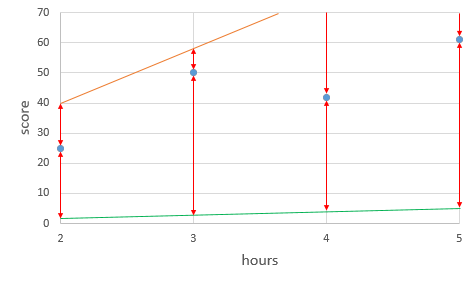

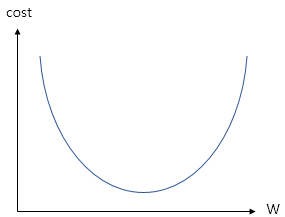

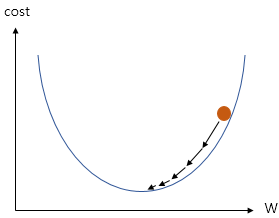

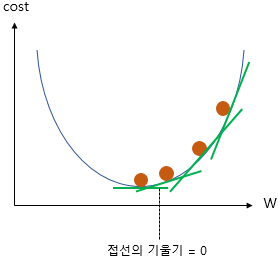

현재 W에 접선의 기울기(gradient)를 구해 특정 숫자 α를 곱한 값을 빼서 새로운 W로 사용하는 식이 사용됩니다.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>g</mi>
  <mi>r</mi>
  <mi>a</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>e</mi>
  <mi>n</mi>
  <mi>t</mi>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mrow data-mjx-texclass="ORD">
        <mo>&#x2202;</mo>
      </mrow>
      <mi>c</mi>
      <mi>o</mi>
      <mi>s</mi>
      <mi>t</mi>
      <mo stretchy="false">(</mo>
      <mi>W</mi>
      <mo stretchy="false">)</mo>
    </mrow>
    <mrow>
      <mrow data-mjx-texclass="ORD">
        <mo>&#x2202;</mo>
      </mrow>
      <mi>W</mi>
    </mrow>
  </mfrac>
</math>

- 기울기가 음수일 때(Negative gradient) : W의 값이 증가

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>W</mi>
  <mo>:=</mo>
  <mi>W</mi>
  <mo>&#x2212;</mo>
  <mi>&#x3B1;</mi>
  <mi>&#xD7;</mi>
  <mo stretchy="false">(</mo>
  <mo>&#x2212;</mo>
  <mi>g</mi>
  <mi>r</mi>
  <mi>a</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>e</mi>
  <mi>n</mi>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>W</mi>
  <mo>+</mo>
  <mi>&#x3B1;</mi>
  <mi>&#xD7;</mi>
  <mi>g</mi>
  <mi>r</mi>
  <mi>a</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>e</mi>
  <mi>n</mi>
  <mi>t</mi>
</math>

- 기울기가 양수일 때(Pogitive gradient): W의 값이 감소

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>W</mi>
  <mo>:=</mo>
  <mi>W</mi>
  <mo>&#x2212;</mo>
  <mi>&#x3B1;</mi>
  <mi>&#xD7;</mi>
  <mo stretchy="false">(</mo>
  <mo>+</mo>
  <mi>g</mi>
  <mi>r</mi>
  <mi>a</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>e</mi>
  <mi>n</mi>
  <mi>t</mi>
  <mo stretchy="false">)</mo>
</math>

즉, 아래의 수식은 접선의 기울기가 음수거나, 양수일 때 모두 접선의 기울기가 0인 방향으로 W의 값을 조정합니다.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>W</mi>
  <mo>:=</mo>
  <mi>W</mi>
  <mo>&#x2212;</mo>
  <mi>&#x3B1;</mi>
  <mfrac>
    <mrow data-mjx-texclass="ORD">
      <mo>&#x2202;</mo>
    </mrow>
    <mrow>
      <mrow data-mjx-texclass="ORD">
        <mo>&#x2202;</mo>
      </mrow>
      <mi>W</mi>
    </mrow>
  </mfrac>
  <mi>c</mi>
  <mi>o</mi>
  <mi>s</mi>
  <mi>t</mi>
  <mo stretchy="false">(</mo>
  <mi>W</mi>
  <mo stretchy="false">)</mo>
</math>

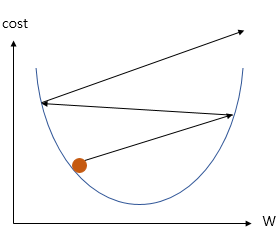

위의 그림은 학습률 α가 지나치게 높은 값을 가질 때, 접선의 기울기가 0이 되는 W를 찾아가는 것이 아니라 cost의 값이 발산하는 상황을 보여줍니다. 

반대로 학습률 α가 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 α의 값을 찾아내는 것도 중요합니다.

## 파이토치로 선형 회귀 구현하기

1) 기본 셋팅

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
# 현재 실습하고 있는 파이썬 코드를 재실행해도 다음에도 같은 결과가 나오도록 랜덤 시드(random seed)를 줍니다.
torch.manual_seed(1)

2) 변수 선언

In [5]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [6]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [7]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


3) 가중치와 편향의 초기화

In [8]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True) 
# 가중치 W를 출력
print(W) 

tensor([0.], requires_grad=True)


In [9]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


4) 가설 세우기

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>W</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
</math>

In [10]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


5) 비용 함수 선언하기

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>c</mi>
  <mi>o</mi>
  <mi>s</mi>
  <mi>t</mi>
  <mo stretchy="false">(</mo>
  <mi>W</mi>
  <mo>,</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mi>n</mi>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow data-mjx-texclass="ORD">
      <mi>i</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>n</mi>
    </mrow>
  </munderover>
  <msup>
    <mrow data-mjx-texclass="INNER">
      <mo data-mjx-texclass="OPEN">[</mo>
      <msup>
        <mi>y</mi>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">(</mo>
          <mi>i</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
      <mo>&#x2212;</mo>
      <mi>H</mi>
      <mo stretchy="false">(</mo>
      <msup>
        <mi>x</mi>
        <mrow data-mjx-texclass="ORD">
          <mo stretchy="false">(</mo>
          <mi>i</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
      <mo stretchy="false">)</mo>
      <mo data-mjx-texclass="CLOSE">]</mo>
    </mrow>
    <mn>2</mn>
  </msup>
</math>

In [11]:
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


6) 경사 하강법 구현하기

In [12]:
optimizer = optim.SGD([W, b], lr=0.01)

In [13]:
# gradient를 0으로 초기화
optimizer.zero_grad() 
# 비용 함수를 미분하여 gradient 계산
cost.backward() 
# W와 b를 업데이트
optimizer.step() 

7) 전체 코드

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 랜덤 시드 고정
torch.manual_seed(1)

# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는만큼 경사 하강법을 반복

for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

8) optimizer.zero_grad()가 필요한 이유

In [15]:
import torch
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

  z = 2*w

  z.backward()
  print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


9) 자동 미분(Autograd) 실습하기

In [16]:
import torch

w = torch.tensor(2.0, requires_grad=True)   # w는 2.0으로 초기화하고, 미분을 수행할 변수임을 명시
y = w**2
z = 2*y + 5

z.backward()    # backward()를 호출하면 해당 수식의 w에 대한 기울기를 계산
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0
